In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

In [3]:
import pandas as pd
from numpy import array
#import dailyData
datadf = pd.read_csv("dailyData/dailyData.csv") 

In [4]:
datadf['lottoNum'] = datadf['First Number'].astype(str) +  datadf['Second Number'].astype(str) +  datadf['Third Number'].astype(str) 
datadf.head()

,Draw Date,Draw Schedule,First Number,Second Number,Third Number,lottoNum
0,7/9/2019,Morning,8,1,3,813
1,7/9/2019,Evening,2,3,0,230
2,7/10/2019,Morning,9,9,5,995
3,7/10/2019,Evening,2,3,2,232
4,7/11/2019,Morning,4,3,2,432


In [5]:
datadf['lottoX'] = datadf['lottoNum'].shift(-1)
dataLotto = datadf[['lottoNum', 'lottoX']].astype(float)
cleanData = dataLotto.dropna()
cleanData.head()

,lottoNum,lottoX
0,813.0,230.0
1,230.0,995.0
2,995.0,232.0
3,232.0,432.0
4,432.0,362.0


In [6]:

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [7]:
# choose a number of time steps
n_steps = 2
# split into samples
X, y = split_sequence(np.asarray(cleanData['lottoX']), n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]

In [8]:

print("Shape: ", X.shape, y.shape)

Shape:  (215, 2) (215,)


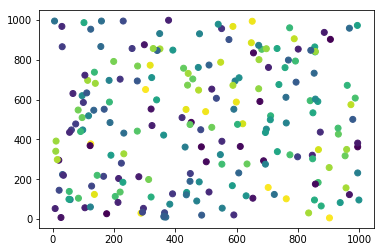

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [10]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [17]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [19]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

ValueError: A target array with shape (161, 996) was passed for an output of shape (None, 2) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

ValueError: A target array with shape (161, 996) was passed for an output of shape (None, 2) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.